# Practice Assignment: Understanding Distributions Through Sampling

** *This assignment is optional, and I encourage you to share your solutions with me and your peers in the discussion forums!* **


To complete this assignment, create a code cell that:
* Creates a number of subplots using the `pyplot subplots` or `matplotlib gridspec` functionality.
* Creates an animation, pulling between 100 and 1000 samples from each of the random variables (`x1`, `x2`, `x3`, `x4`) for each plot and plotting this as we did in the lecture on animation.
* **Bonus:** Go above and beyond and "wow" your classmates (and me!) by looking into matplotlib widgets and adding a widget which allows for parameterization of the distributions behind the sampling animations.


Tips:
* Before you start, think about the different ways you can create this visualization to be as interesting and effective as possible.
* Take a look at the histograms below to get an idea of what the random variables look like, as well as their positioning with respect to one another. This is just a guide, so be creative in how you lay things out!
* Try to keep the length of your animation reasonable (roughly between 10 and 30 seconds).

<IPython.core.display.Javascript object>


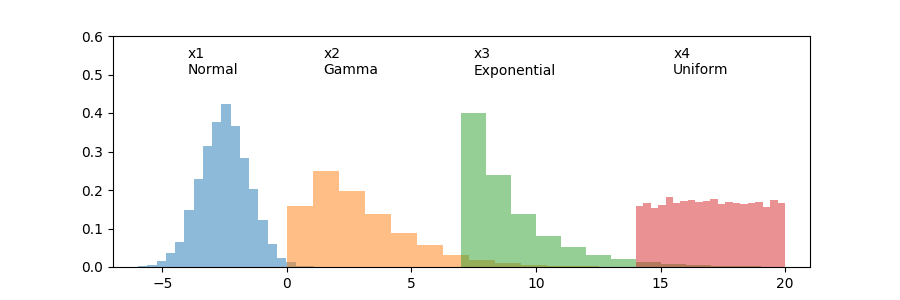

In [21]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib notebook

# generate 4 random variables from the random, gamma, exponential, and uniform distributions
x1 = np.random.normal(-2.5, 1, 10000)
x2 = np.random.gamma(2, 1.5, 10000)
x3 = np.random.exponential(2, 10000)+7
x4 = np.random.uniform(14,20, 10000)

# plot the histograms
plt.figure(figsize=(9,3))
plt.hist(x1, normed=True, bins=20, alpha=0.5)
plt.hist(x2, normed=True, bins=20, alpha=0.5)
plt.hist(x3, normed=True, bins=20, alpha=0.5)
plt.hist(x4, normed=True, bins=20, alpha=0.5);
plt.axis([-7,21,0,0.6])

plt.text(x1.mean()-1.5, 0.5, 'x1\nNormal')
plt.text(x2.mean()-1.5, 0.5, 'x2\nGamma')
plt.text(x3.mean()-1.5, 0.5, 'x3\nExponential')
plt.text(x4.mean()-1.5, 0.5, 'x4\nUniform')

<IPython.core.display.Javascript object>


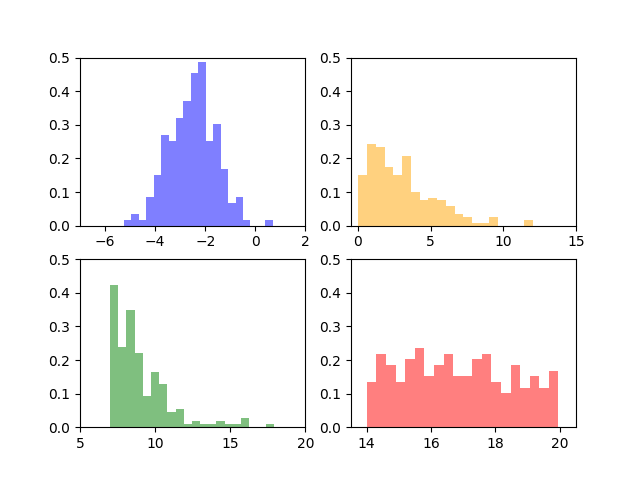

[13.5, 20.5, 0, 0.5]

In [7]:
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import numpy as np

%matplotlib notebook

plt.figure()
gspec = gridspec.GridSpec(2, 2)

normal_histogram = plt.subplot(gspec[0, 0])
gamma_histogram = plt.subplot(gspec[0, 1])
exponential_histogram = plt.subplot(gspec[1, 0])
uniform_histogram = plt.subplot(gspec[1, 1])

# generate 4 random variables from the random, gamma, exponential, and uniform distributions
x1 = np.random.normal(-2.5, 1, 200)
x2 = np.random.gamma(2, 1.5, 200)
x3 = np.random.exponential(2, 200)+7
x4 = np.random.uniform(14,20, 200)

normal_histogram.hist(x1, normed=True, bins=20, alpha=0.5, color = "blue")
normal_histogram.axis([-7, 2, 0, 0.5])
gamma_histogram.hist(x2, normed=True, bins=20, alpha=0.5, color = "orange")
gamma_histogram.axis([-0.5, 15, 0, 0.5])
exponential_histogram.hist(x3, normed=True, bins=20, alpha=0.5, color = "green")
exponential_histogram.axis([5, 20, 0, 0.5])
uniform_histogram.hist(x4, normed=True, bins=20, alpha=0.5, color = "red")
uniform_histogram.axis([13.5, 20.5, 0, 0.5])





<IPython.core.display.Javascript object>


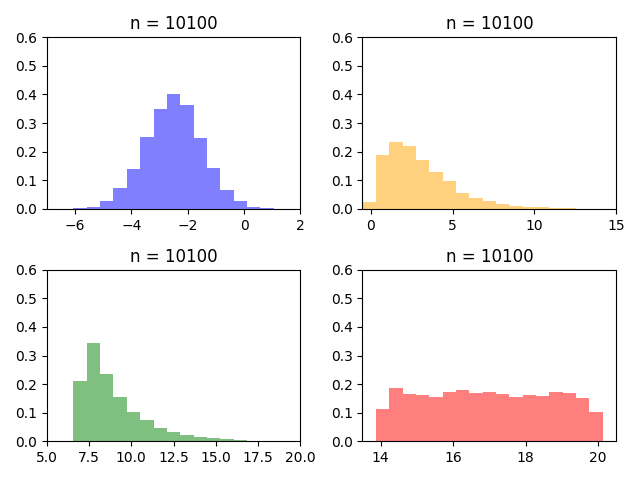

In [20]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.animation as animation
import matplotlib.gridspec as gridspec

%matplotlib notebook

# generate 4 random variables from the random, gamma, exponential, and uniform distributions
x1 = np.random.normal(-2.5, 1, 10000)
x2 = np.random.gamma(2, 1.5, 10000)
x3 = np.random.exponential(2, 10000)+7
x4 = np.random.uniform(14,20, 10000)
bins1 = np.linspace(-7, 2, 20)
bins2 = np.linspace(-0.5, 15, 20)
bins3 = np.linspace(5, 20, 20)
bins4 = np.linspace(13.5, 20.5, 20)

def update(curr):
    
    if curr == 101: 
        a.event_source.stop()
        
    normal_histogram.cla()
    gamma_histogram.cla()
    exponential_histogram.cla()
    uniform_histogram.cla()
    
    x1 = np.random.normal(-2.5, 1, 100*curr)
    x2 = np.random.gamma(2, 1.5, 100*curr)
    x3 = np.random.exponential(2, 100*curr)+7
    x4 = np.random.uniform(14,20, 100*curr)
    
    normal_histogram.hist(x1, bins=bins1, normed = True, alpha=0.5, color = "blue")
    gamma_histogram.hist(x2, bins=bins2, normed = True, alpha=0.5, color = "orange")
    exponential_histogram.hist(x3, bins=bins3, normed = True, alpha=0.5, color = "green")
    uniform_histogram.hist(x4, bins=bins4, normed = True, alpha=0.5, color = "red")
    
    normal_histogram.axis([-7, 2, 0, 0.6])
    gamma_histogram.axis([-0.5, 15, 0, 0.6])
    exponential_histogram.axis([5, 20, 0, 0.6])
    uniform_histogram.axis([13.5, 20.5, 0, 0.6])
    
    normal_histogram.set_title('n = {}'.format(100*curr))
    gamma_histogram.set_title('n = {}'.format(100*curr))
    exponential_histogram.set_title('n = {}'.format(100*curr))
    uniform_histogram.set_title('n = {}'.format(100*curr))
    
    plt.tight_layout()
    

#gspec = gridspec.GridSpec(2, 2)
#fig = plt.figure()

normal_histogram.hist(x1, bins=bins1, normed = True, alpha=0.5, color = "blue")
gamma_histogram.hist(x2, bins=bins2, normed = True, alpha=0.5, color = "orange")
exponential_histogram.hist(x3, bins=bins3, normed = True, alpha=0.5, color = "green")
uniform_histogram.hist(x4, bins=bins4, normed = True, alpha=0.5, color = "red")

fig, ((normal_histogram, gamma_histogram), (exponential_histogram, uniform_histogram)) = plt.subplots(2, 2, sharey = True)
#normal_histogram = plt.subplot(gspec[0, 0])
#gamma_histogram = plt.subplot(gspec[0, 1])
#exponential_histogram = plt.subplot(gspec[1, 0])
#uniform_histogram = plt.subplot(gspec[1, 1])
a = animation.FuncAnimation(fig, update, interval=100)